In [1]:
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('clingo_results_run_1.csv', header=None, names=['pkg', 'cfg', 'iter', 'setup', 'load', 'ground', 'solve', 'total'])
df_2 = pd.read_csv('clingo_results_run_2.csv', header=None, names=['pkg', 'cfg', 'iter', 'setup', 'load', 'ground', 'solve', 'total'])

In [4]:
df_1.head()

,pkg,cfg,iter,setup,load,ground,solve,total
0,activeharmony,tweety,0,1.355411,0.007706,0.020982,0.007214,1.405336
1,acpid,tweety,0,1.409873,0.005905,0.142078,0.147754,1.830644
2,activeharmony,tweety,1,1.339542,0.005062,0.016881,0.006525,1.379720
3,aeskeyfind,tweety,0,1.357546,0.008257,0.024373,0.010330,1.411277
4,acpid,tweety,1,1.387102,0.005307,0.124510,0.124953,1.776918


In [5]:
df_2.head()

,pkg,cfg,iter,setup,load,ground,solve,total
0,aeskeyfind,handy,0,1.315733,0.007014,0.019357,0.011834,1.364408
1,activeharmony,handy,0,1.304661,0.005882,0.016701,0.007950,1.349746
2,acpid,handy,0,1.431826,0.010578,0.116915,0.203695,1.883334
3,ace,handy,0,1.341894,0.007096,0.019143,0.011826,1.390135
4,acct,handy,0,1.305883,0.005380,0.018395,0.010820,1.350525


In [6]:
df_full = pd.concat([df_1, df_2])
df_full.head()

,pkg,cfg,iter,setup,load,ground,solve,total
0,activeharmony,tweety,0,1.355411,0.007706,0.020982,0.007214,1.405336
1,acpid,tweety,0,1.409873,0.005905,0.142078,0.147754,1.830644
2,activeharmony,tweety,1,1.339542,0.005062,0.016881,0.006525,1.379720
3,aeskeyfind,tweety,0,1.357546,0.008257,0.024373,0.010330,1.411277
4,acpid,tweety,1,1.387102,0.005307,0.124510,0.124953,1.776918


In [7]:
packs = df_full['pkg']
print(packs)

0        activeharmony
1                acpid
2        activeharmony
3           aeskeyfind
4                acpid
             ...      
50956             vasp
50957             vasp
50958             vasp
50959             vasp
50960             vasp
Name: pkg, Length: 118913, dtype: object


In [8]:
pk_ls = sorted(list(set(packs)))
print(len(pk_ls))

5664


In [9]:
df_full[df_full['pkg'] == pk_ls[0]]

,pkg,cfg,iter,setup,load,ground,solve,total
2479,3dtk,tweety,0,6.909152,0.004954,6.001471,12.975648,27.356099
4284,3dtk,tweety,1,6.204110,0.004983,6.758891,12.792447,27.183157
5600,3dtk,tweety,2,6.327180,0.005421,7.085608,12.319571,27.241949
6408,3dtk,handy,0,6.436585,0.005304,7.407938,15.198899,30.586357
7028,3dtk,handy,1,6.286015,0.005325,6.908926,14.100167,28.898565
7557,3dtk,handy,2,6.281186,0.005377,6.861877,13.150336,27.898572
8105,3dtk,trendy,0,6.384547,0.005498,6.851726,14.665460,29.698606
8642,3dtk,trendy,1,6.350790,0.013837,6.934559,13.741477,28.728642
9342,3dtk,trendy,2,6.303274,0.005366,6.653289,14.721360,29.348797
10222,3dtk,many,0,6.305613,0.005163,6.636072,14.667171,29.354621


In [10]:
confs = df_full['cfg']
cfg_ls = list(set(confs))
print(cfg_ls)
# print(len(cfg_ls))

[' many', ' trendy', ' handy', ' tweety']


In [11]:
tmp_df = df_full[df_full['pkg'] == pk_ls[0]]
tmp_df.head()

,pkg,cfg,iter,setup,load,ground,solve,total
2479,3dtk,tweety,0,6.909152,0.004954,6.001471,12.975648,27.356099
4284,3dtk,tweety,1,6.204110,0.004983,6.758891,12.792447,27.183157
5600,3dtk,tweety,2,6.327180,0.005421,7.085608,12.319571,27.241949
6408,3dtk,handy,0,6.436585,0.005304,7.407938,15.198899,30.586357
7028,3dtk,handy,1,6.286015,0.005325,6.908926,14.100167,28.898565


In [12]:
tdf = tmp_df[tmp_df['cfg'] == cfg_ls[0]]
tdf.head()

,pkg,cfg,iter,setup,load,ground,solve,total
10222,3dtk,many,0,6.305613,0.005163,6.636072,14.667171,29.354621
11441,3dtk,many,1,6.273046,0.005485,6.702842,14.862102,29.464688
12656,3dtk,many,2,6.274049,0.005368,7.020630,14.135423,29.015411
1772,3dtk,many,0,6.296882,0.005601,6.908443,16.370735,31.179507
1998,3dtk,many,1,6.351620,0.005639,6.720823,15.567101,30.257241


In [13]:
tdf['setup'].median()

6.285465717315674

In [14]:
phases = ['setup', 'load', 'ground', 'solve', 'total']

In [15]:
timings = {}

for cf in cfg_ls:
    timings[cf] = {}
    for ph in phases:
        timings[cf][ph] = []
    for pk in pk_ls:
        tmp_df = df_full[df_full['pkg'] == pk]
        tdf = tmp_df[tmp_df['cfg'] == cf]
        for ph in phases:
            timings[cf][ph].append(tdf[ph].median())

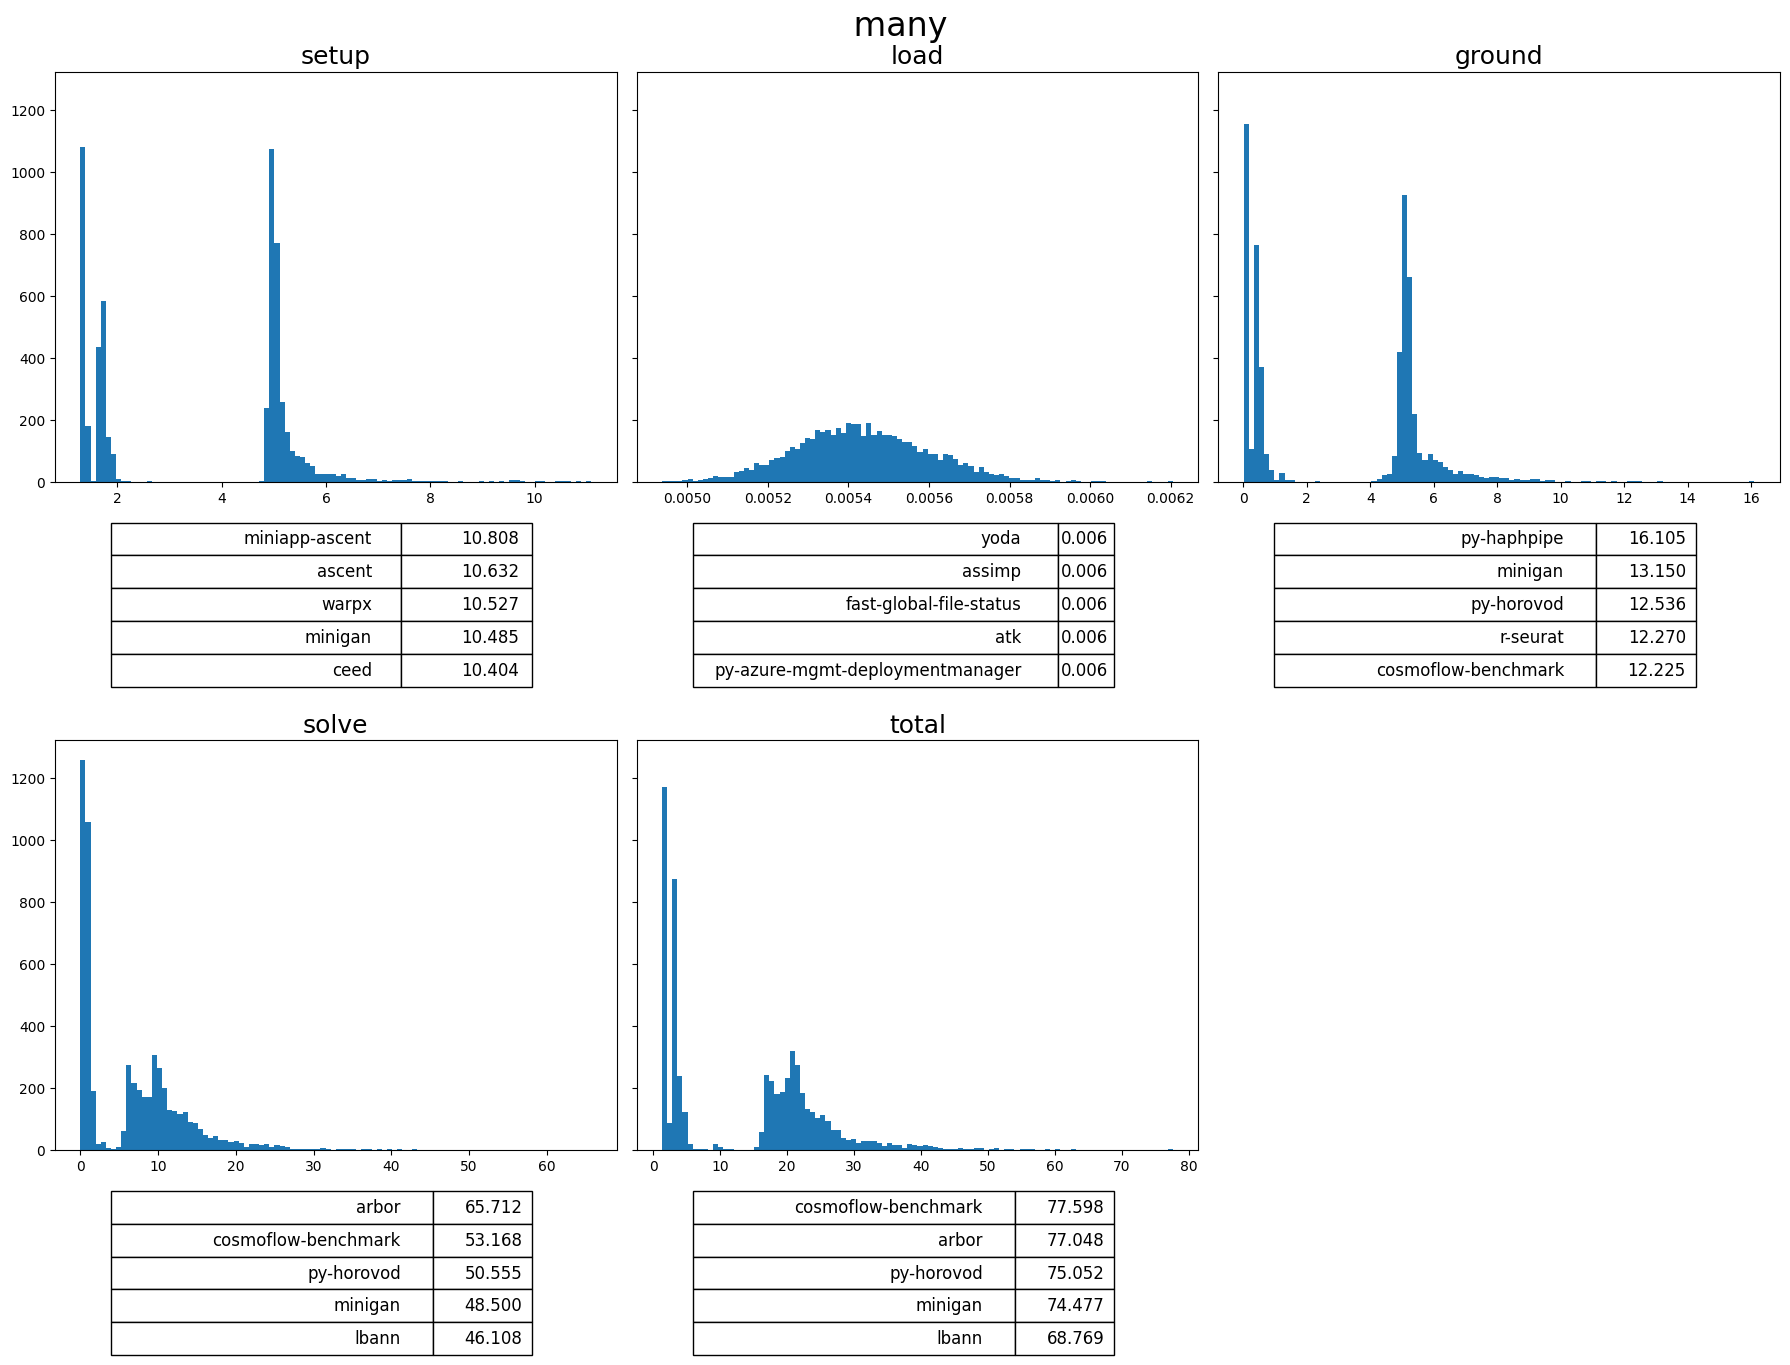

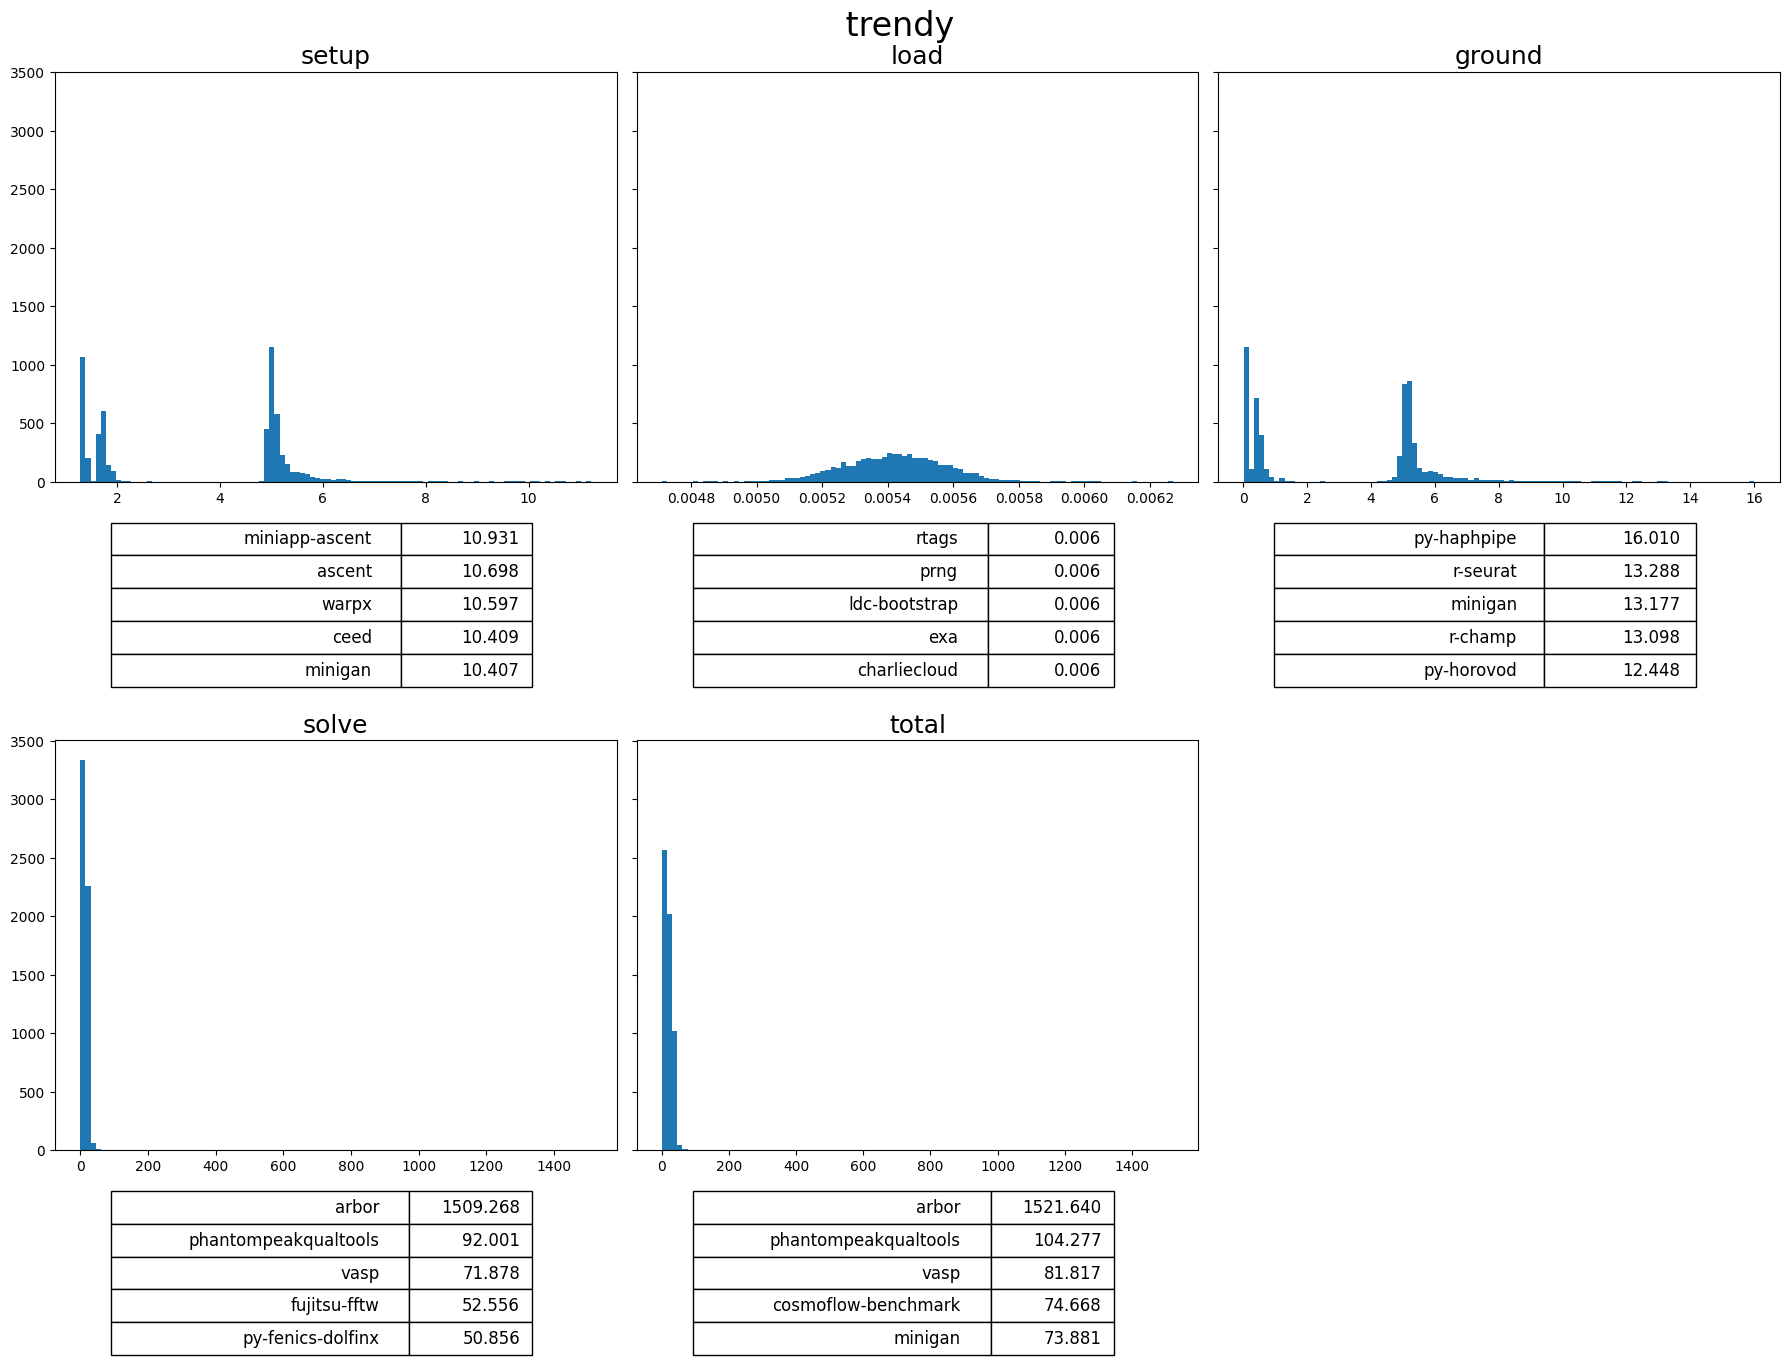

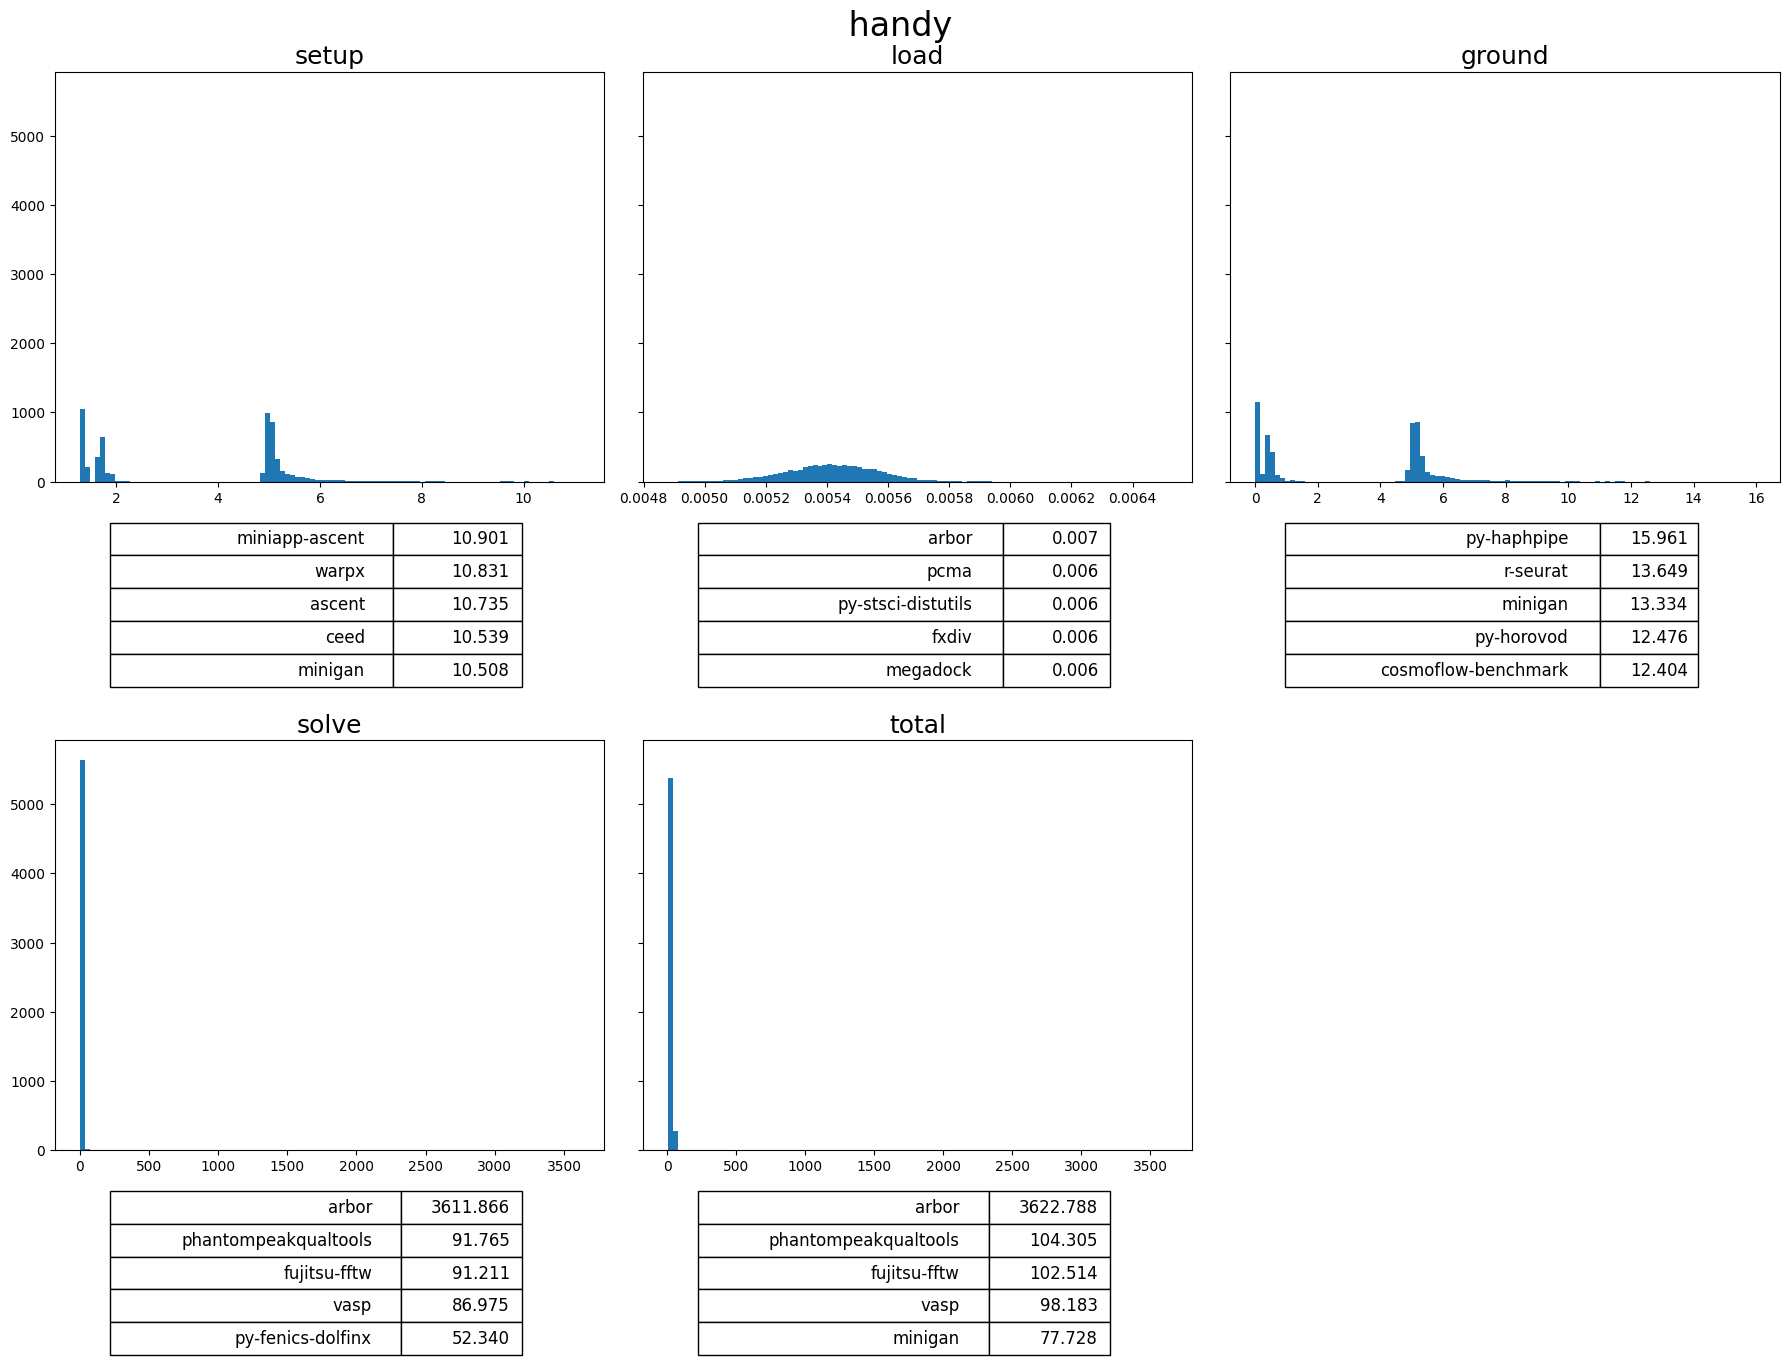

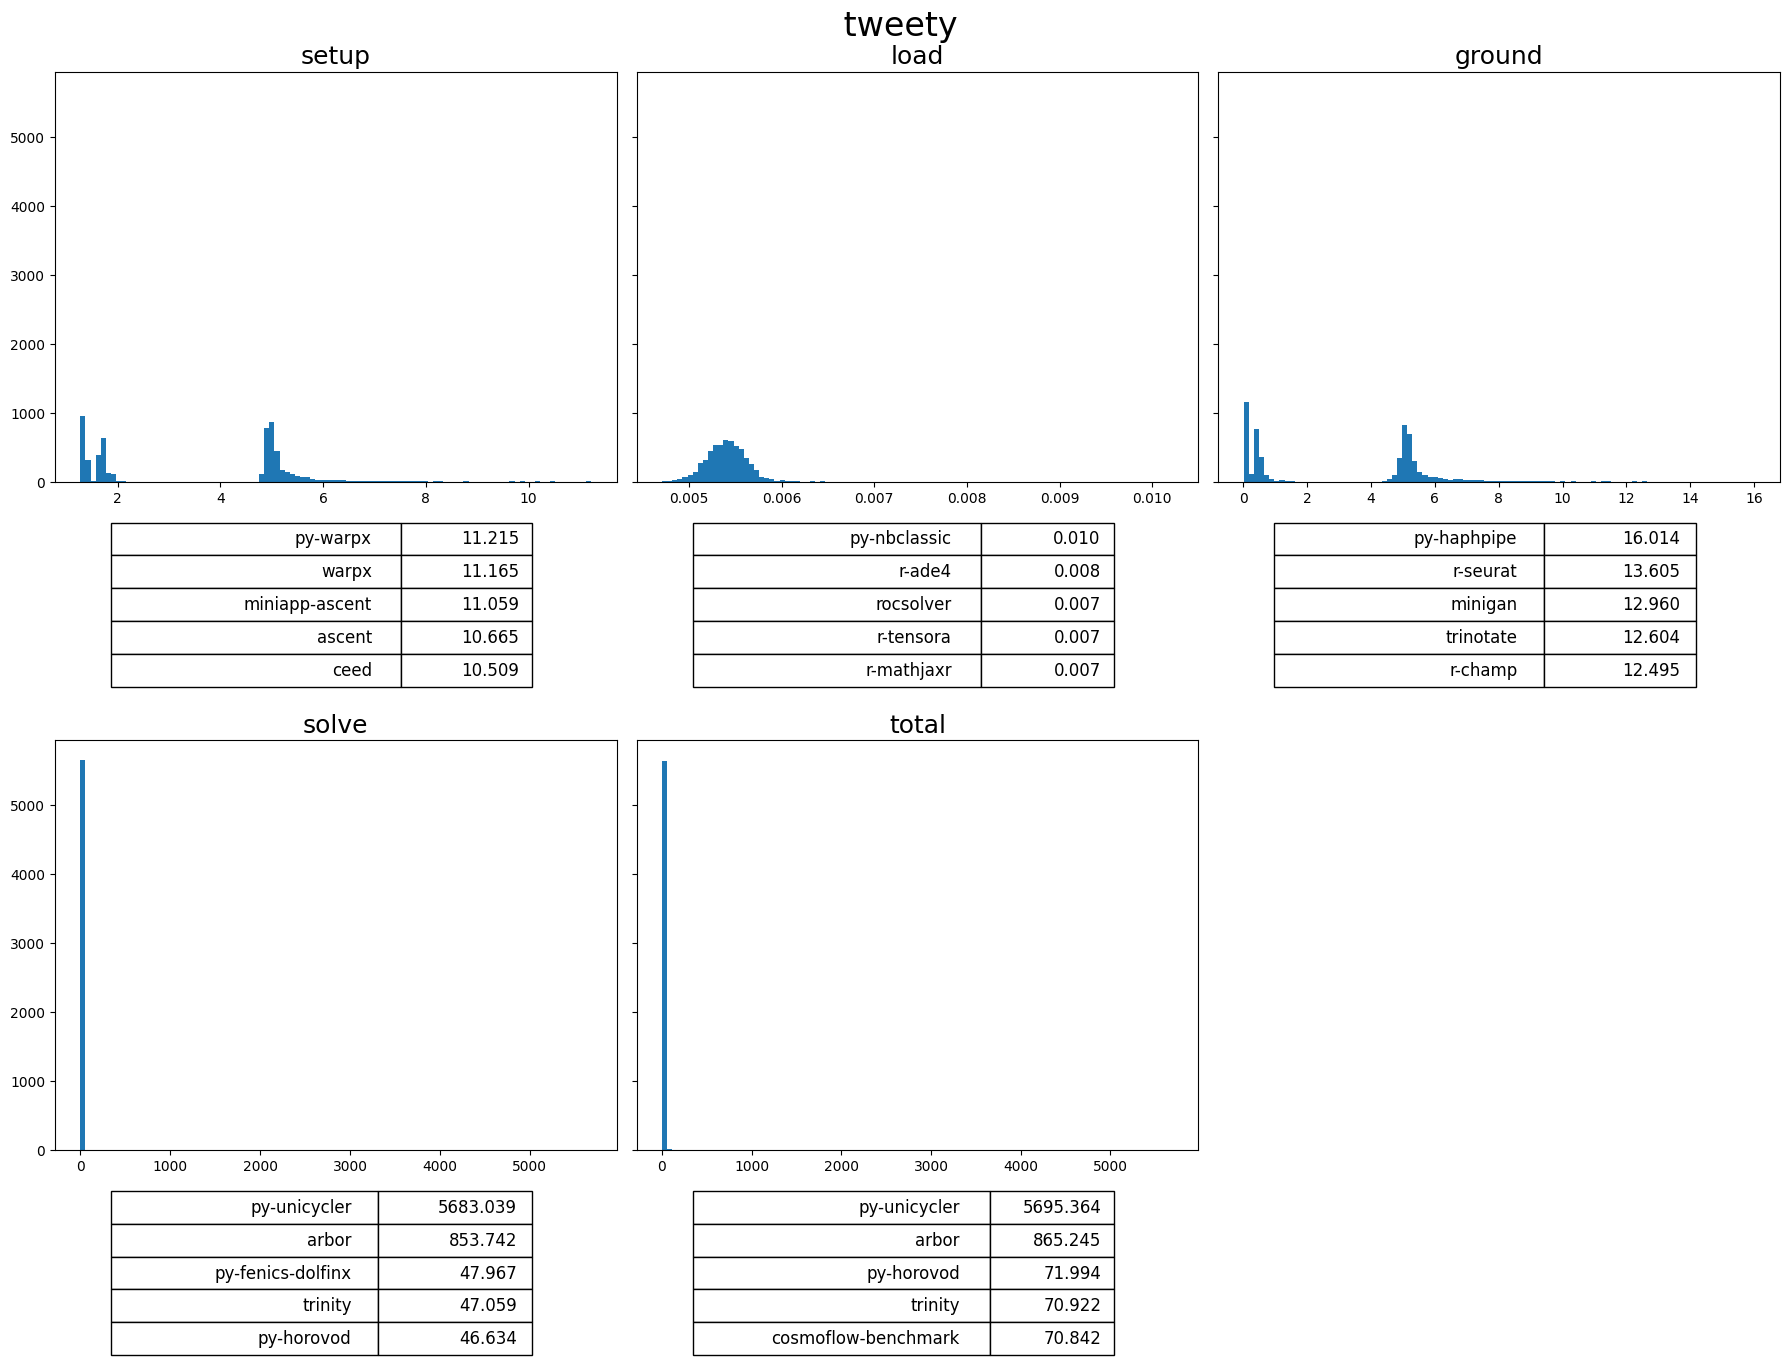

In [16]:
for cf in cfg_ls:
    fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True, figsize=(18,14), dpi=100)
    axes = list(axs.flatten())
    n_bins = 100

    fig.suptitle(cf, fontsize=24)
    
    axes[5].remove()
    for i, ph in enumerate(phases):
        solve_times = sorted(zip(pk_ls, timings[cf][ph]), key=lambda x: x[1], reverse=True)
        tab_data = [[p, "{:.3f}".format(t)] for p, t in solve_times[0:5]]
#         print(solve_times[0:5])
#         [p for p, t in solve_times[0:5]]
        axes[i].hist(sorted(timings[cf][ph], reverse=True), n_bins, label=ph)
#         axes[i].legend(fontsize='medium')
#         tab = axes[i].table(cellText=[["{:.3f}".format(t) for p, t in solve_times[0:5]], [p for p, t in solve_times[0:5]]],
#                       rowLabels=['times', 'pkg'],
        axes[i].set_title(ph, fontsize=18)
#         axes[i].title.set_text(ph)
        tab = axes[i].table(cellText=tab_data, bbox=[0.1, -0.5, 0.75, 0.4])
        tab.auto_set_font_size(False)
        tab.auto_set_column_width(col=[0, 1])
        tab.set_fontsize(12)
#     plt.show()
    plt.savefig('times_fig_{0}.png'.format(cf.strip()), dpi=150)